Electric Vehicle Analytics — Range, Efficiency, Charging & CO₂

This notebook explores an electric-vehicle dataset to understand fleet performance and usage patterns. I’ll do light data cleaning, set correct data types, and use straightforward exploration and visualization to examine key metrics: vehicle count, driving range (km), energy consumption (kWh/100 km), efficiency (km/kWh), charging power/time, costs, and CO₂ saved. I’ll compare results by region, vehicle type, make, and year, and create a few helper features (e.g., efficiency and cost per 100 km) to make insights clearer. The goal is to generate practical findings that feed directly into the accompanying Power BI dashboard and provide a reproducible workflow alongside the SQL scripts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DB_MODE = False  # set True if you want to pull from MySQL
CSV_PATH = "D:/MS IT/GITHUB FINAL/sql housing/electric_vehicle_analytics.csv"  # use the cleaned file I generated

In [6]:
df = pd.read_csv(CSV_PATH)
df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


In [7]:
# 2. Quick data health checks -----------------------------------------------
df.info()
display(df.isna().sum().sort_values(ascending=False).to_frame("nulls"))
display(df.describe(include="all").transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

,nulls
Vehicle_ID,0
Make,0
Model,0
Year,0
Region,0
Vehicle_Type,0
Battery_Capacity_kWh,0
Battery_Health_%,0
Range_km,0
Charging_Power_kW,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Vehicle_ID,3000.0,NaN,NaN,NaN,1500.5,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Make,3000,10,Ford,323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,3000,23,Niro EV,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3000.0,NaN,NaN,NaN,2019.499667,2.848047,2015.0,2017.0,2020.0,2022.0,2024.0
Region,3000,4,Australia,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Type,3000,4,Hatchback,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Battery_Capacity_kWh,3000.0,NaN,NaN,NaN,74.8101,25.734079,30.0,53.0,74.85,96.9,120.0
Battery_Health_%,3000.0,NaN,NaN,NaN,85.03,8.589526,70.0,77.775,85.25,92.3,100.0
Range_km,3000.0,NaN,NaN,NaN,374.414667,137.184112,121.0,260.0,371.0,476.25,713.0
Charging_Power_kW,3000.0,NaN,NaN,NaN,129.301,68.742745,11.1,70.9,126.7,187.975,250.0


In [8]:
# 3. KPIs & simple aggregations ---------------------------------------------
kpis = {
    "vehicles": len(df),
    "avg_range_km": df["Range_km"].mean(),
    "avg_batt_kWh": df["Battery_Capacity_kWh"].mean(),
    "avg_cost_per_km_usd": df["Cost_per_km_USD"].mean() if "Cost_per_km_USD" in df else (df["Energy_Consumption_kWh_per_100km"]/100 * df["Electricity_Cost_USD_per_kWh"]).mean(),
    "total_co2_tons": df["CO2_Saved_tons"].sum(),
}
kpis

{'vehicles': 3000,
 'avg_range_km': np.float64(374.4146666666667),
 'avg_batt_kWh': np.float64(74.81009999999999),
 'avg_cost_per_km_usd': np.float64(0.04022934833333333),
 'total_co2_tons': np.float64(45075.490000000005)}

In [9]:
# 4. Helper plotters (matplotlib only; one chart per figure) ----------------
def hist(col, bins=30):
    plt.figure()
    df[col].dropna().hist(bins=bins)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.show()

def top_counts(col, n=10):
    vc = df[col].value_counts().head(n)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(f"Top {n}: {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.show()

def line_agg(x_col, y_col, agg="mean"):
    temp = df.groupby(x_col, dropna=False)[y_col].agg(agg).reset_index()
    plt.figure()
    plt.plot(temp[x_col], temp[y_col])
    plt.title(f"{agg.title()} {y_col} by {x_col}")
    plt.xlabel(x_col); plt.ylabel(f"{agg}({y_col})")
    plt.show()

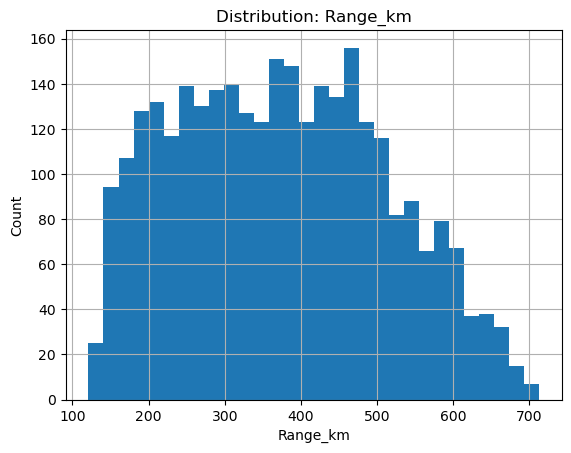

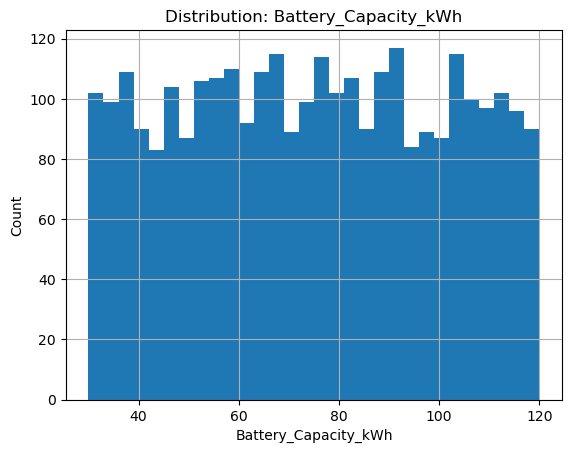

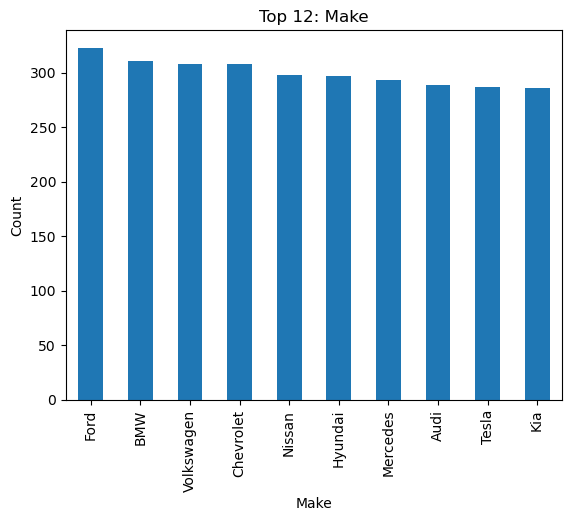

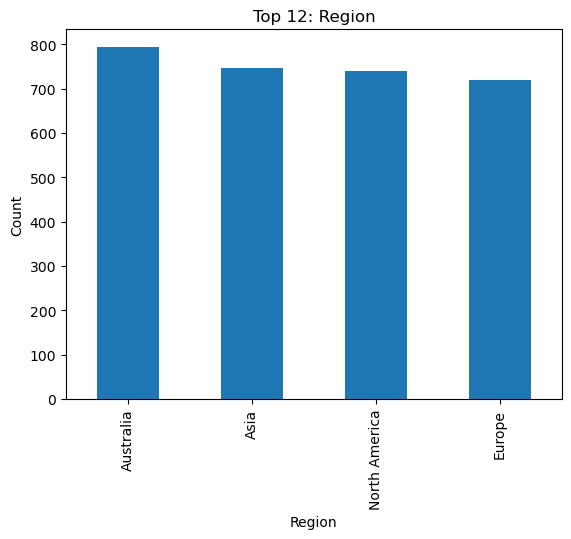

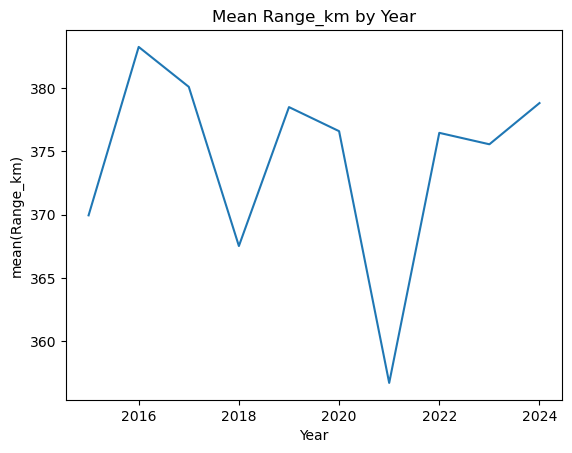

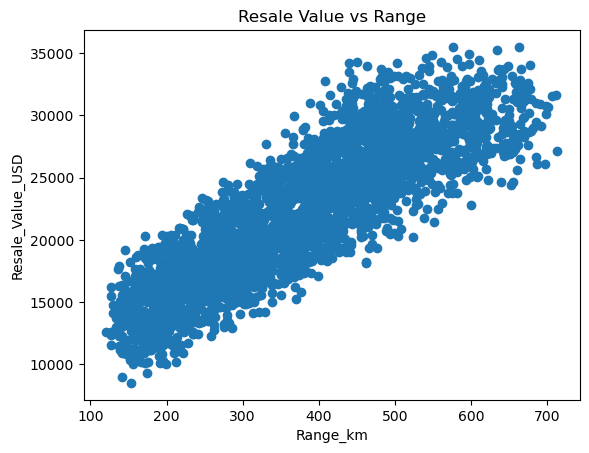

In [10]:
# 5. Core visuals ------------------------------------------------------------
hist("Range_km")
hist("Battery_Capacity_kWh")
top_counts("Make", n=12)
top_counts("Region", n=12)
line_agg("Year", "Range_km", agg="mean")

# Scatter: resale value vs range
plt.figure()
plt.scatter(df["Range_km"], df["Resale_Value_USD"])
plt.title("Resale Value vs Range")
plt.xlabel("Range_km"); plt.ylabel("Resale_Value_USD")
plt.show()

In [ ]:
# 6. Efficiency table (km per kWh) ------------------------------------------
eff = (df.assign(Range_per_kWh_km = df["Range_km"]/df["Battery_Capacity_kWh"])
         .groupby(["Make","Model"], as_index=False)
         .agg(vehicles=("Vehicle_ID","count"),
              avg_range_per_kWh=("Range_per_kWh_km","mean"),
              avg_range_km=("Range_km","mean")))
eff = eff[eff["vehicles"]>=5].sort_values("avg_range_per_kWh", ascending=False)
eff.head(20)

,Make,Model,vehicles,avg_range_per_kWh,avg_range_km
10,Hyundai,Kona Electric,154,5.048726,385.305195
1,Audi,e-tron,147,5.044854,370.625850
8,Ford,Mustang Mach-E,161,5.038327,380.732919
5,Chevrolet,Bolt EUV,163,5.035450,383.656442
16,Nissan,Leaf,154,5.030865,360.733766
7,Ford,F-150 Lightning,162,5.030233,383.882716
0,Audi,Q4 e-tron,142,5.013994,390.084507
9,Hyundai,Ioniq 5,143,5.010676,381.055944
22,Volkswagen,ID.4,152,5.008893,352.585526
2,BMW,i3,112,5.004751,366.687500


In [12]:
# 7. Export for BI (optional) ------------------------------------------------
out = df.copy()
out.to_csv("ev_analytics_clean_for_bi.csv", index=False)
print("Saved:", "ev_analytics_clean_for_bi.csv")

Saved: ev_analytics_clean_for_bi.csv
